**Analysis 4**

Univariate Analysis

In [19]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [20]:
df = pd.read_csv("CARSSSS.csv")
# to display the top 5 rows
df.head(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [21]:
df.tail(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
1271,Honda,City,Vx Mt Diesel,"1,302,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1272,Honda,City,Zx Mt Diesel,"1,421,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1273,Honda,City,Zx Cvt Petrol,"1,431,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,18,22.60,119.0,145.0,Automatic,2600.0
1274,Honda,City,V Cvt Petrol,"1,201,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,14.3,17.80,119.0,145.0,Automatic,2600.0
1275,Mitsubishi,Montero,3.2 At,"6,862,560",3200.0,4.0,AWD (All Wheel Drive),Injection,88.0,Diesel,1900.0,4900.0,1875.0,5.0,8.25,11.56,202.0,441.0,Automatic,2780.0


**Checking the type of data**


In [4]:
df.dtypes

Make                       object
Model                      object
Variant                    object
Price                      object
Displacement              float64
Cylinders                 float64
Drivetrain                 object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Height                    float64
Length                    float64
Width                     float64
Doors                     float64
City_Mileage               object
ARAI_Certified_Mileage    float64
Power                     float64
Torque                    float64
Type                       object
Wheelbase                 float64
dtype: object

**Dropping the duplicate rows**

In [22]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9, 20)


**Now lets remove the duplicate data because its ok to remove them**

In [23]:
df.count()   #used to count the number of rows

Make                      1201
Model                     1276
Variant                   1276
Price                     1276
Displacement              1264
Cylinders                 1210
Drivetrain                1269
Fuel_System               1268
Fuel_Tank_Capacity        1207
Fuel_Type                 1276
Height                    1275
Length                    1276
Width                     1264
Doors                     1272
City_Mileage               721
ARAI_Certified_Mileage    1162
Power                     1276
Torque                    1274
Type                      1275
Wheelbase                 1256
dtype: int64

In [24]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [25]:
df.count()

Make                      1192
Model                     1267
Variant                   1267
Price                     1267
Displacement              1255
Cylinders                 1201
Drivetrain                1260
Fuel_System               1259
Fuel_Tank_Capacity        1198
Fuel_Type                 1267
Height                    1266
Length                    1267
Width                     1255
Doors                     1263
City_Mileage               713
ARAI_Certified_Mileage    1153
Power                     1267
Torque                    1265
Type                      1266
Wheelbase                 1247
dtype: int64

**Dropping the missing or null values**

In [26]:
print(df.isnull().sum())

Make                       75
Model                       0
Variant                     0
Price                       0
Displacement               12
Cylinders                  66
Drivetrain                  7
Fuel_System                 8
Fuel_Tank_Capacity         69
Fuel_Type                   0
Height                      1
Length                      0
Width                      12
Doors                       4
City_Mileage              554
ARAI_Certified_Mileage    114
Power                       0
Torque                      2
Type                        1
Wheelbase                  20
dtype: int64


In [27]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make                      608
Model                     608
Variant                   608
Price                     608
Displacement              608
Cylinders                 608
Drivetrain                608
Fuel_System               608
Fuel_Tank_Capacity        608
Fuel_Type                 608
Height                    608
Length                    608
Width                     608
Doors                     608
City_Mileage              608
ARAI_Certified_Mileage    608
Power                     608
Torque                    608
Type                      608
Wheelbase                 608
dtype: int64

In [28]:
print(df.isnull().sum())   # After dropping the values

Make                      0
Model                     0
Variant                   0
Price                     0
Displacement              0
Cylinders                 0
Drivetrain                0
Fuel_System               0
Fuel_Tank_Capacity        0
Fuel_Type                 0
Height                    0
Length                    0
Width                     0
Doors                     0
City_Mileage              0
ARAI_Certified_Mileage    0
Power                     0
Torque                    0
Type                      0
Wheelbase                 0
dtype: int64


Converting the object values to integer type.

While having a look at the data, the Price was stored as an object type. This is a serious problem because it is impossible to plot those values on a graph because it is a primary requirement that during plotting a graph all the values must be of type integer data. The author has stored, the Price in a different format (Rs2,34,000) so I had to remove the formatting and then convert them to an integer.

In [29]:
# Removing the formatting
df['Price'] = df['Price'].astype(str)
df['Price'] = [x.replace('Rs',' ') for x in df['Price']]
df['Price'] = [x.replace(',', '') for x in df['Price']]  

In [30]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

Univariant Analysis

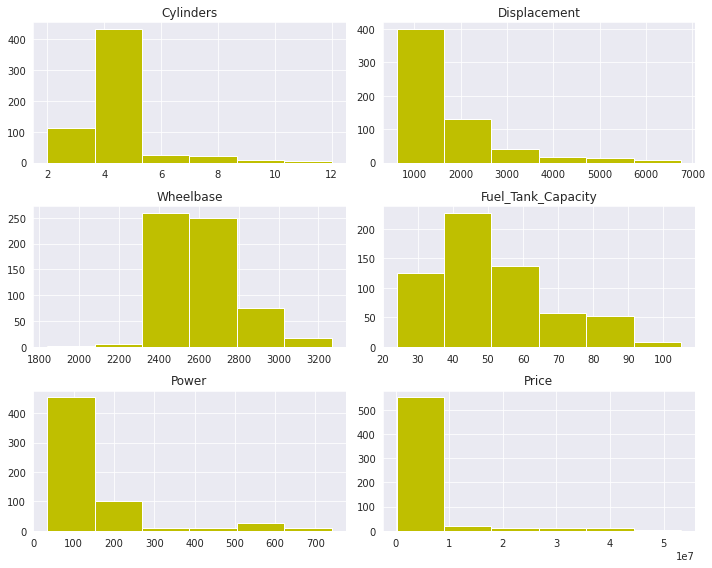

In [31]:
df[['Cylinders','Displacement','Wheelbase','Fuel_Tank_Capacity','Power','Price']].hist(figsize=(10,8),bins=6,color='Y')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

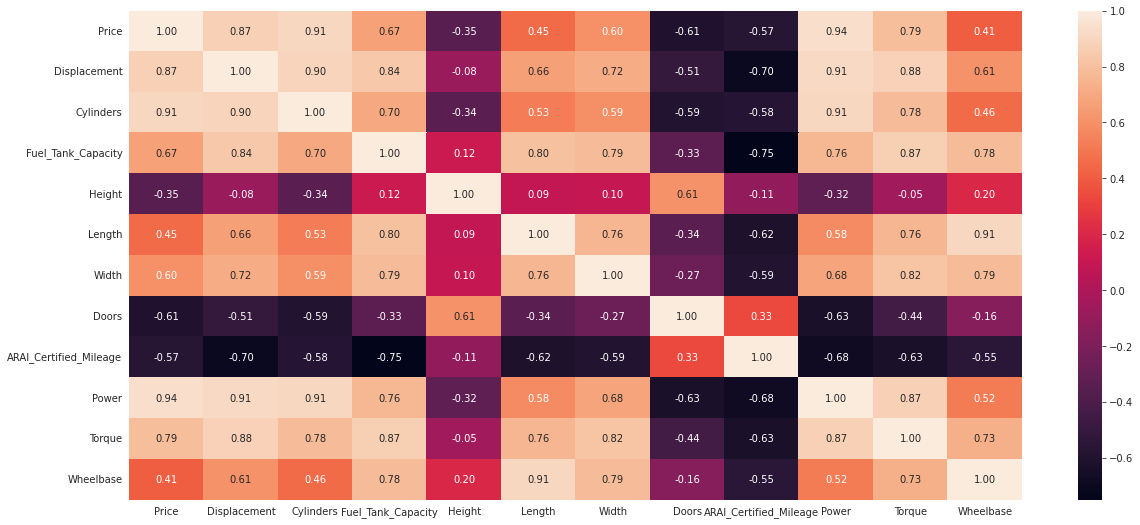

In [32]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Bivariate Analysis

Price Analysis

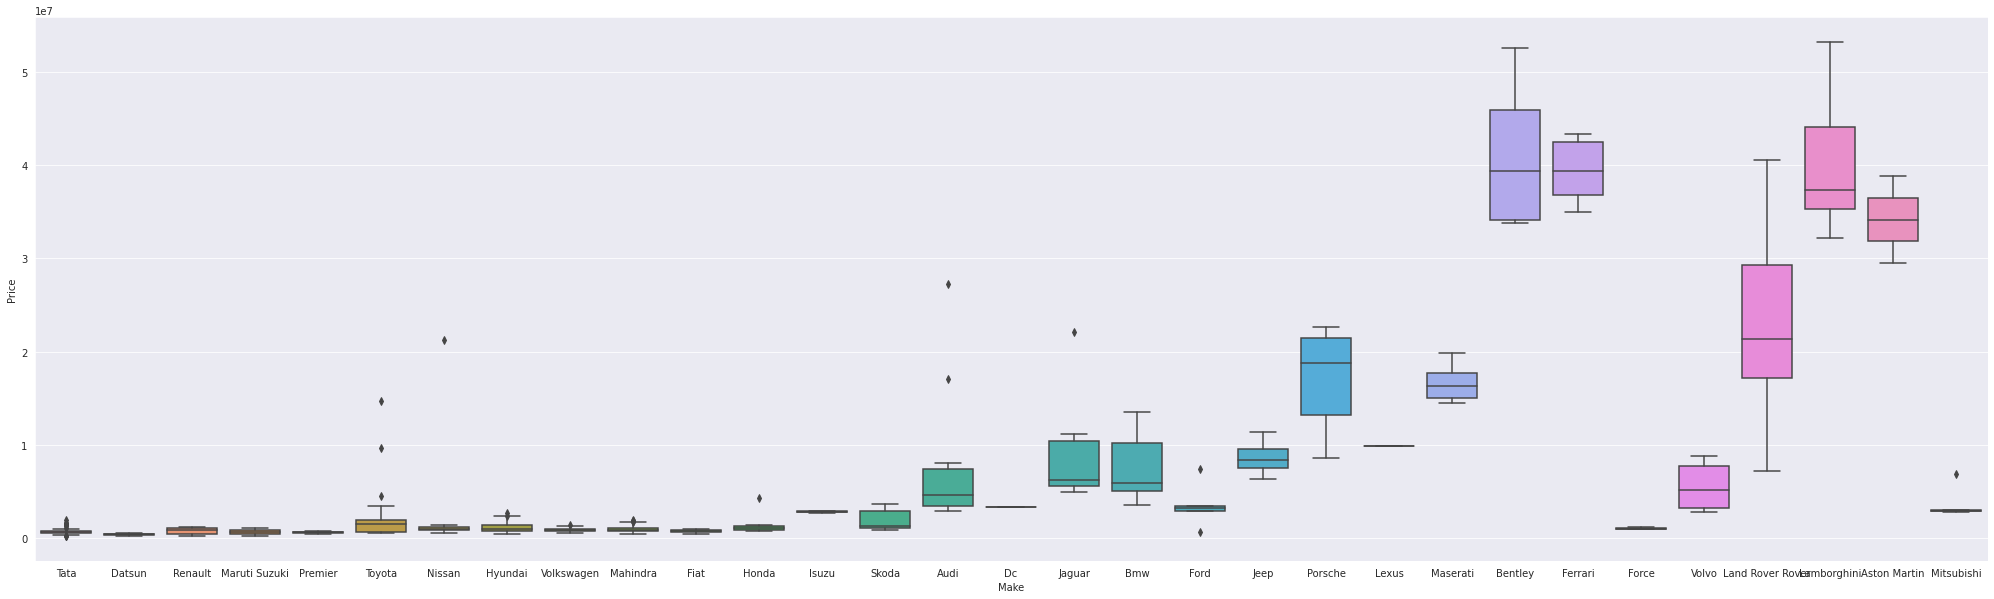

In [33]:
plt.rcParams['figure.figsize']=(35,10)
ax = sns.boxplot(x="Make", y="Price", data=df)

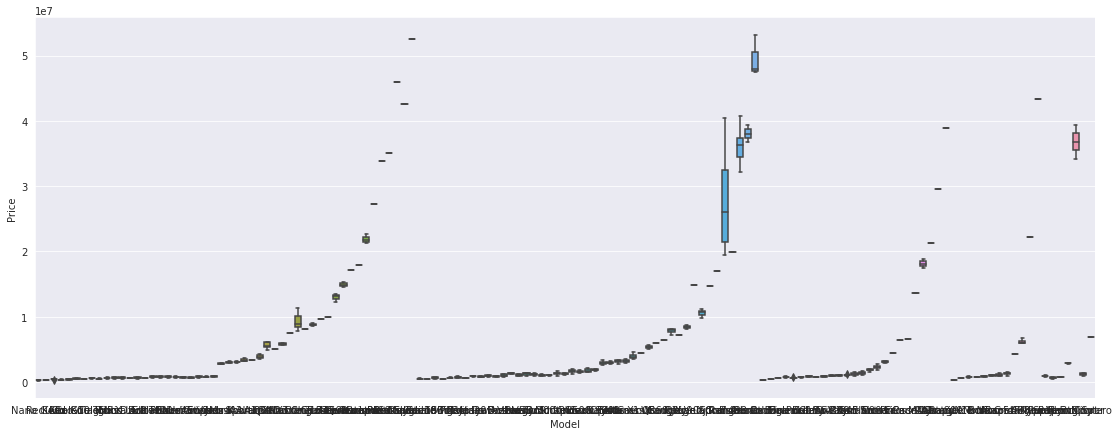

In [34]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="Model", y="Price", data=df)

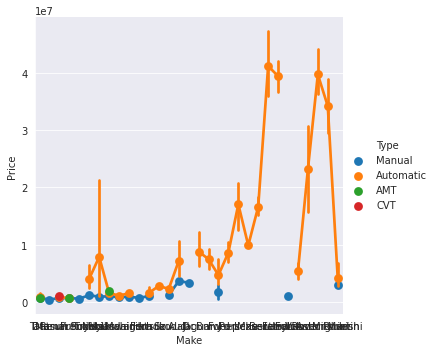

In [35]:
sns.catplot(data=df, x="Make", y="Price", hue="Type" ,kind="point")

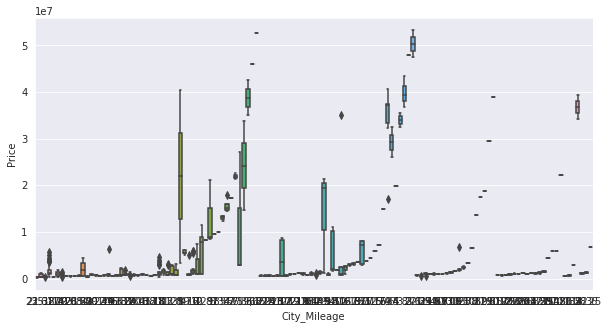

In [36]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="City_Mileage", y="Price", data=df)

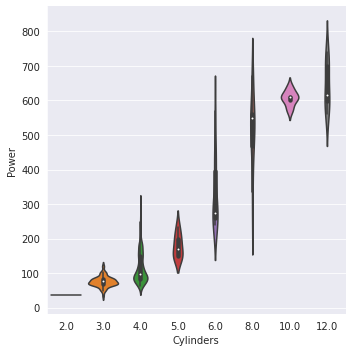

In [37]:
sns.catplot(data=df, x="Cylinders", y="Power",kind="violin")

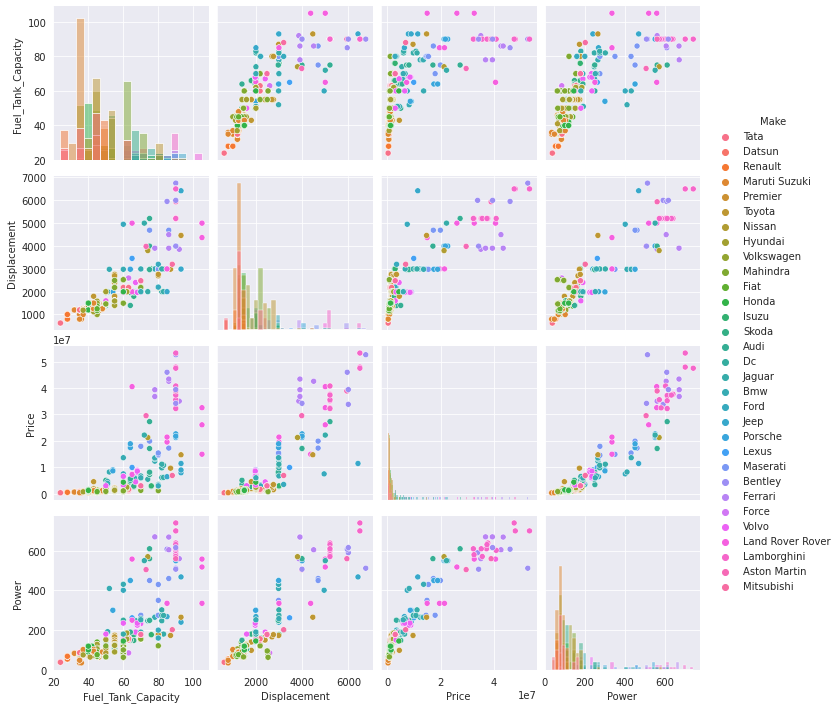

In [38]:
g = sns.pairplot(df[["Fuel_Tank_Capacity", "Displacement", "Price","Power","Make"]], hue="Make", diag_kind="hist")